In [289]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [290]:
# reading the input file

housing = pd.read_csv("train.csv")

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [291]:
housing.shape

(1460, 81)

In [292]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [293]:
# count the number of null values present in the data

round(housing.isnull().sum()/len(housing.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

### Certain columns have greater than 85% missing values so we will be removing them

    -Alley
    -PoolQC
    -Miscfeature

In [294]:
housing.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace = True)

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [295]:
# count the number of null values present in the data

round(housing.isnull().sum()/len(housing.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
                 ...  
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars 

#### Checking the correlation between numerical columns

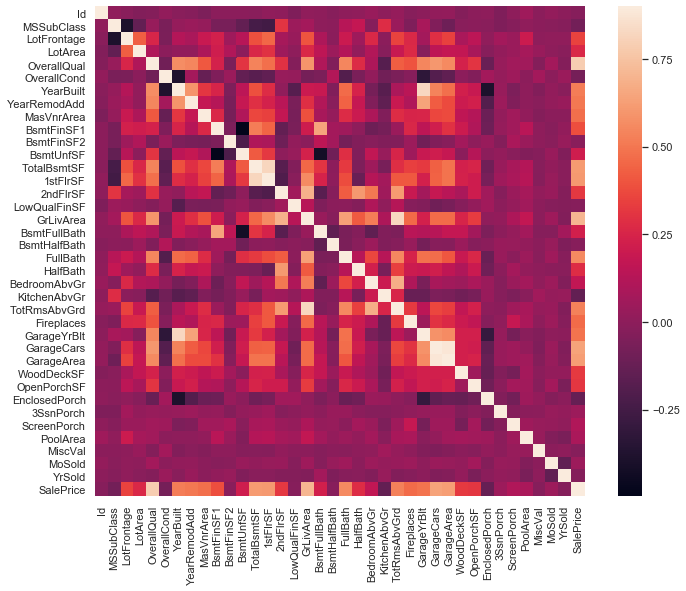

In [296]:
#Correlation map to see how features are correlated with SalePrice
corrmat = housing.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

#### From the pairplot given above we can see that some of the numerical colums are highly related with the sales price

    - LotFrontage
    - Overall Quality
    - Year Built
    - Year removeadd
    - MasVnrArea
    - TotalBsmn SF
    - 1st Foor SF
    - Gr ving Area
    - Fullbath
    - Fireplaces
    - Garage Area
    
#### We will be keeping them in our consideration while building our model
    

#### Let us also check what are the most corelated values present in the data from the ~80 odd variables

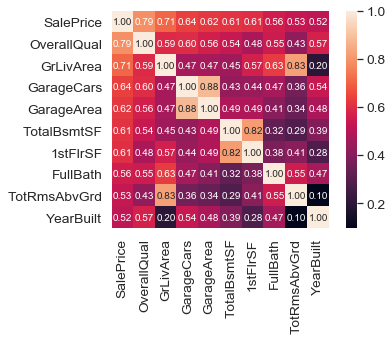

In [297]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### We can see from the above chart that the top 10 variables are similar to what we had initially deciphered

    - OverallQual - It is obvious that having a good quality house would fetch bigger price
    - Grlivarea - More the area of the floor above the ground floor, greater is the price
    - Garage cars, garage area, total basement SF, 1st floor SF -Seems to make sense 

#### Let us plot the graphs between some of these important numerical variables and see if we see any pattern

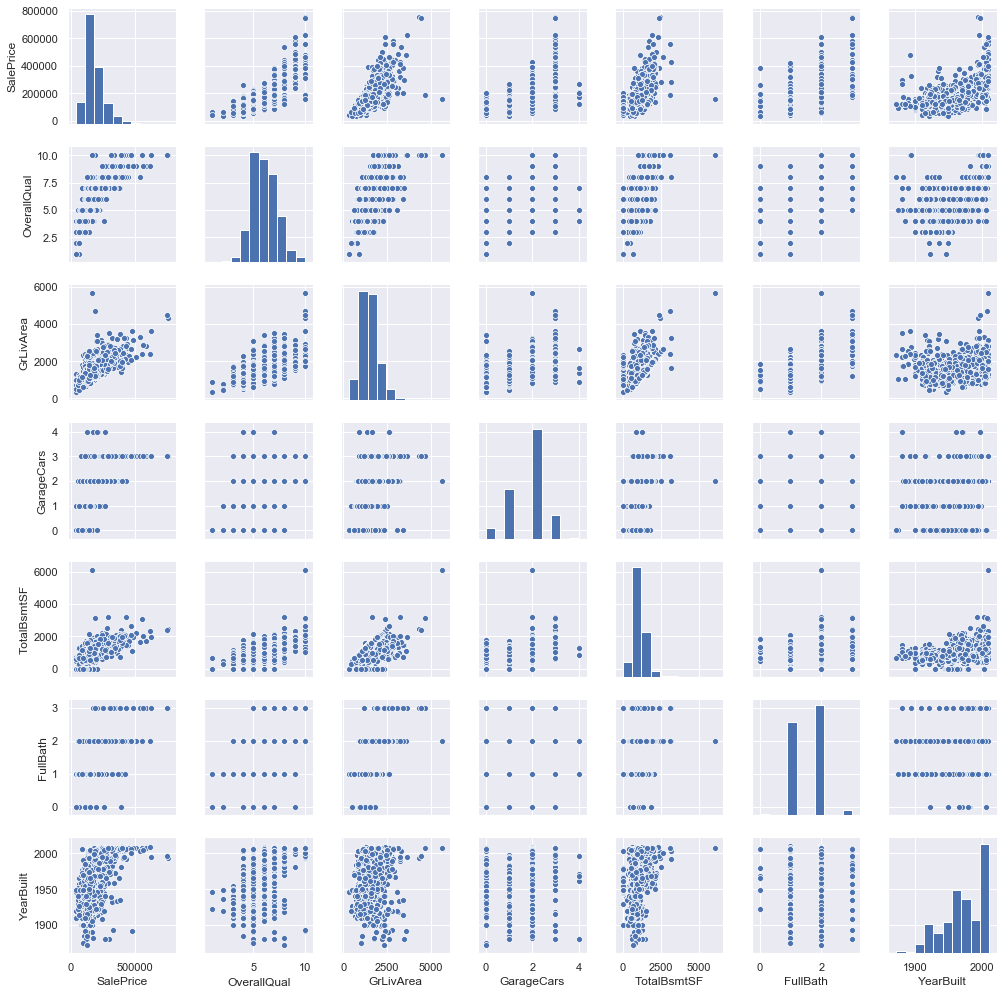

In [298]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing[cols],height = 2)
plt.show()


#### Now let us see what % of of data is missing (apart from the 3 we have already removed) and how can we treat them

In [299]:
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027


#### We notice that 'Fence' has ~81% of the data missing and hence can be dropped

In [300]:
housing['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [301]:
housing.drop(['Fence'],axis=1,inplace = True)

In [302]:
housing.shape

(1460, 77)

In [303]:
housing['FireplaceQu'].value_counts()/len(housing['FireplaceQu'])*100

Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64

In [304]:
housing['LotFrontage'].value_counts()/len(housing['LotFrontage'])*100

60.0     9.794521
70.0     4.794521
80.0     4.726027
50.0     3.904110
75.0     3.630137
65.0     3.013699
85.0     2.739726
78.0     1.712329
21.0     1.575342
90.0     1.575342
68.0     1.301370
24.0     1.301370
64.0     1.301370
73.0     1.232877
72.0     1.164384
79.0     1.164384
63.0     1.164384
55.0     1.164384
100.0    1.095890
51.0     1.027397
66.0     1.027397
74.0     1.027397
52.0     0.958904
59.0     0.890411
71.0     0.821918
82.0     0.821918
40.0     0.821918
43.0     0.821918
67.0     0.821918
57.0     0.821918
           ...   
129.0    0.136986
124.0    0.136986
118.0    0.136986
101.0    0.136986
122.0    0.136986
121.0    0.136986
115.0    0.136986
109.0    0.136986
116.0    0.136986
114.0    0.136986
150.0    0.068493
111.0    0.068493
153.0    0.068493
182.0    0.068493
46.0     0.068493
112.0    0.068493
149.0    0.068493
141.0    0.068493
33.0     0.068493
152.0    0.068493
160.0    0.068493
168.0    0.068493
128.0    0.068493
144.0    0.068493
39.0     0

In [305]:
housing['GarageCond'].value_counts()/len(housing['GarageCond'])*100

TA    90.821918
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: GarageCond, dtype: float64

In [306]:
housing['GarageType'].value_counts()/len(housing['GarageType'])*100

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

In [307]:
housing['GarageYrBlt'].value_counts()/len(housing['GarageYrBlt'])*100

2005.0    4.452055
2006.0    4.041096
2004.0    3.630137
2003.0    3.424658
2007.0    3.356164
1977.0    2.397260
1998.0    2.123288
1999.0    2.054795
2008.0    1.986301
1976.0    1.986301
2000.0    1.849315
2002.0    1.780822
1968.0    1.780822
1950.0    1.643836
1993.0    1.506849
2009.0    1.438356
1965.0    1.438356
1966.0    1.438356
1962.0    1.438356
1958.0    1.438356
2001.0    1.369863
1996.0    1.369863
1957.0    1.369863
1970.0    1.369863
1960.0    1.301370
1997.0    1.301370
1978.0    1.301370
1954.0    1.301370
1974.0    1.232877
1994.0    1.232877
            ...   
1922.0    0.342466
1936.0    0.342466
1916.0    0.342466
1931.0    0.273973
1945.0    0.273973
1935.0    0.273973
1928.0    0.273973
1946.0    0.273973
1982.0    0.273973
1938.0    0.205479
1921.0    0.205479
1924.0    0.205479
1910.0    0.205479
1952.0    0.205479
1932.0    0.205479
2010.0    0.205479
1923.0    0.205479
1937.0    0.136986
1934.0    0.136986
1918.0    0.136986
1947.0    0.136986
1929.0    0.

In [308]:
housing['GarageFinish'].value_counts()/len(housing['GarageFinish'])*100

Unf    41.438356
RFn    28.904110
Fin    24.109589
Name: GarageFinish, dtype: float64

In [309]:
housing['GarageQual'].value_counts()/len(housing['GarageQual'])*100

TA    89.794521
Fa     3.287671
Gd     0.958904
Po     0.205479
Ex     0.205479
Name: GarageQual, dtype: float64

In [310]:
housing['BsmtExposure'].value_counts()/len(housing['BsmtExposure'])*100

No    65.273973
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: BsmtExposure, dtype: float64

In [311]:
housing['BsmtFinType2'].value_counts()/len(housing['BsmtFinType2'])*100

Unf    86.027397
Rec     3.698630
LwQ     3.150685
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64

In [312]:
housing['BsmtFinType1'].value_counts()/len(housing['BsmtFinType1'])*100

Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
Name: BsmtFinType1, dtype: float64

In [313]:
housing['BsmtCond'].value_counts()/len(housing['BsmtCond'])*100

TA    89.794521
Gd     4.452055
Fa     3.082192
Po     0.136986
Name: BsmtCond, dtype: float64

In [314]:
housing['BsmtQual'].value_counts()/len(housing['BsmtQual'])*100

TA    44.452055
Gd    42.328767
Ex     8.287671
Fa     2.397260
Name: BsmtQual, dtype: float64

In [315]:
housing['MasVnrArea'].value_counts()/len(housing['MasVnrArea'])*100

0.0       58.972603
72.0       0.547945
180.0      0.547945
108.0      0.547945
120.0      0.479452
16.0       0.479452
80.0       0.410959
200.0      0.410959
106.0      0.410959
340.0      0.410959
170.0      0.342466
132.0      0.342466
360.0      0.342466
84.0       0.342466
320.0      0.342466
100.0      0.273973
196.0      0.273973
246.0      0.273973
216.0      0.273973
160.0      0.273973
183.0      0.273973
178.0      0.273973
270.0      0.273973
300.0      0.273973
210.0      0.273973
268.0      0.273973
252.0      0.273973
168.0      0.273973
336.0      0.273973
220.0      0.273973
            ...    
14.0       0.068493
53.0       0.068493
24.0       0.068493
127.0      0.068493
365.0      0.068493
115.0      0.068493
562.0      0.068493
259.0      0.068493
378.0      0.068493
219.0      0.068493
161.0      0.068493
247.0      0.068493
109.0      0.068493
278.0      0.068493
375.0      0.068493
225.0      0.068493
604.0      0.068493
762.0      0.068493
290.0      0.068493


In [316]:
housing['MasVnrType'].value_counts()/len(housing['MasVnrType'])*100

None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

#### From the calculations above we can see that some of the columns can be removed directly as they are not adding any variance to our data and hence are not at all useful. 

    - BsmtCond
    - BsmtFinType2
    - BsmtExposure
    - GarageQual
    - GarageYrBlt
    - GarageCond
    - MasVnrArea

In [317]:
housing.drop(['BsmtCond','BsmtFinType2','BsmtExposure','GarageQual','GarageYrBlt','GarageCond','MasVnrArea'],axis=1,inplace = True)

In [318]:
housing.shape

(1460, 70)

In [319]:
qualitative = [f for f in housing.columns if housing.dtypes[f] == 'object']

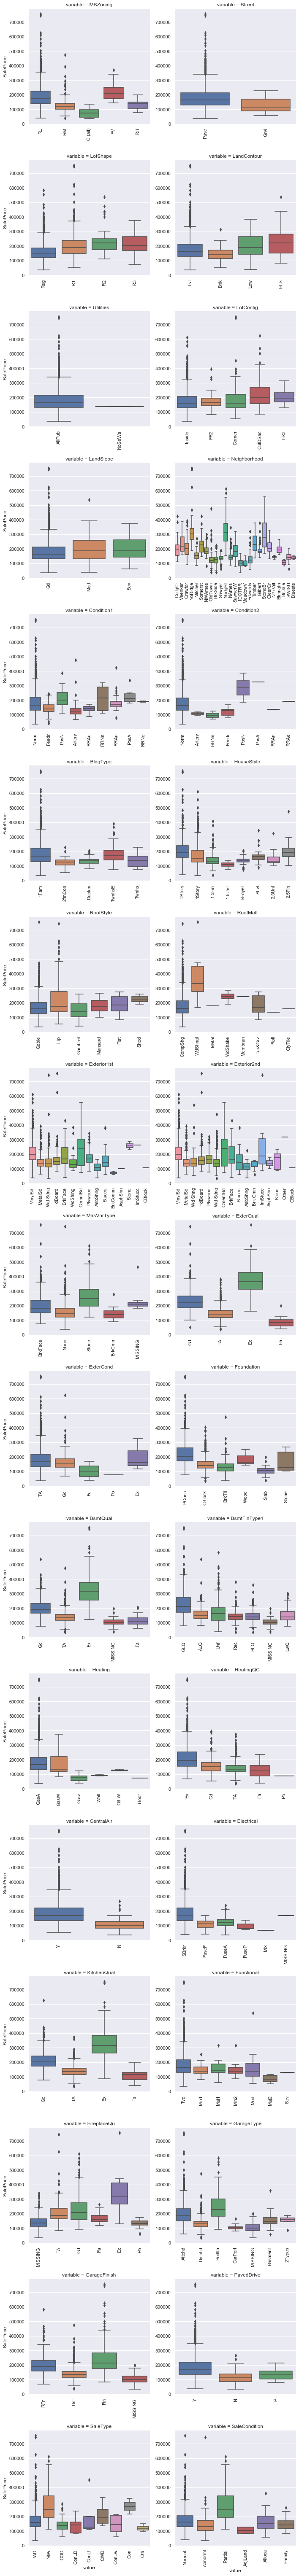

In [320]:
for c in qualitative:
    housing[c] = housing[c].astype('category')
    if housing[c].isnull().any():
        housing[c] = housing[c].cat.add_categories(['MISSING'])
        housing[c] = housing[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

#### Most of these variables have a diverse relationship with the 'Sales' and we will try to define some of them below -

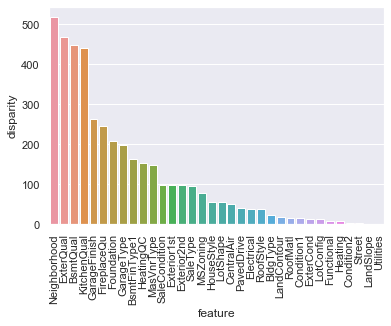

In [321]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(housing)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

#### From the above chart we can see that some of the majorly influencing variables are -

    - Neighbourhood
    - ExterQuality
    - Basement Quality
    - KitchenQuality

#### Now we will create dummy variables for the variables present in the current data set

In [322]:
housing.shape

(1460, 70)

In [323]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null cate

In [324]:
housing['LotFrontage'].fillna('0', inplace = True)

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### Preparing the data for modelling

In [325]:
housing_1 = housing

housing_1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [326]:
y = housing_1['SalePrice']

In [327]:
housing_1.drop(['SalePrice'],axis=1,inplace=True)

In [328]:
housing_1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [329]:
housing_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null categ

#### Creating dummy variable for categorical variable 

In [330]:
housing_categorical = housing_1.select_dtypes(include=['category'])
housing_categorical.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Y,SBrkr,Gd,Typ,MISSING,Attchd,RFn,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,Y,WD,Normal


In [331]:
housing_dummies = pd.get_dummies(housing_categorical)
housing_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [332]:
# Dropping all categorical variables

housing_1 = housing_1.drop(list(housing_categorical.columns),axis=1)

In [333]:
housing_1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65,8450,7,5,2003,2003,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80,9600,6,8,1976,1976,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68,11250,7,5,2001,2002,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60,9550,7,5,1915,1970,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84,14260,8,5,2000,2000,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [334]:
# concat dummy variables with housing dataset
housing_1 = pd.concat([housing_1, housing_dummies], axis=1)

In [335]:
housing_1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65,8450,7,5,2003,2003,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80,9600,6,8,1976,1976,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68,11250,7,5,2001,2002,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60,9550,7,5,1915,1970,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84,14260,8,5,2000,2000,655,0,...,0,0,0,1,0,0,0,0,1,0


In [336]:
# Scaling the features

from sklearn.preprocessing import scale

cols = housing_1.columns
housing_1 = pd.DataFrame(scale(housing_1))
housing_1.columns = cols
housing_1.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=257)

In [342]:
# Split into test and train data set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing_1, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [343]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [362]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003,0,20]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished
C:\Users\sp14590\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003, 0, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [363]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008615,0.001011,0.001604,0.000491,0.0001,{'alpha': 0.0001},-17452.970298,-20854.291366,-21377.417726,-17962.835626,...,-19290.850555,1560.120972,6,-12231.662425,-11894.531155,-12415.995019,-12504.589773,-12074.960035,-12224.347681,221.997048
1,0.007421,0.001359,0.001203,0.000401,0.0005,{'alpha': 0.0005},-17452.961507,-20854.278081,-21377.381869,-17962.791355,...,-19290.819649,1560.121529,5,-12231.655078,-11894.525578,-12415.986189,-12504.588526,-12074.956765,-12224.342427,221.997258
2,0.006610,0.000485,0.001202,0.000401,0.001,{'alpha': 0.001},-17452.950518,-20854.261484,-21377.337047,-17962.736030,...,-19290.781021,1560.122226,4,-12231.645895,-11894.518607,-12415.975152,-12504.586968,-12074.952677,-12224.335860,221.997520
3,0.005816,0.000750,0.001203,0.000750,0.005,{'alpha': 0.005},-17452.862610,-20854.128738,-21376.978498,-17962.293505,...,-19290.472039,1560.127802,2,-12231.572438,-11894.462842,-12415.886860,-12504.574499,-12074.919969,-12224.283322,221.999618
4,0.008222,0.000982,0.001204,0.000402,0.003,{'alpha': 0.003},-17452.906563,-20854.195108,-21377.157765,-17962.514753,...,-19290.626521,1560.125013,3,-12231.609165,-11894.490724,-12415.931004,-12504.580735,-12074.936324,-12224.309590,221.998568


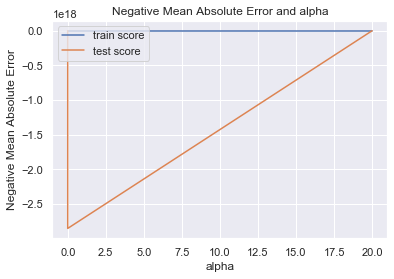

In [364]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [365]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [367]:
from sklearn.metrics import r2_score

In [368]:
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9433910361562495

In [369]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9485794219372388

#### Checking values for different values of alpha (10, 5, 1, 0.01, 0.03, 0.05)

In [370]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.943939160207852

In [371]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9497142346960479

In [372]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9441262515842269

In [373]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9502017056669302

In [374]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9442009339463613

In [385]:
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.95046866551169

#### So we observe that with Ridge regression at alpha we are getting the good r2 result



#### Now we will run the model using Lasso regression model

In [378]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\sp14590\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28217064579.753754, tolerance: 530141897.3717746
  positive)
C:\Users\sp14590\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26612959016.124115, tolerance: 485090176.1391295
  positive)
C:\Users\sp14590\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30218273055.74759, tolerance: 516923243.46955746
  positive)
C:\Users\sp14590\AppData\Local\Continuum\an

C:\Users\sp14590\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133715511902.89297, tolerance: 485090176.1391295
  positive)
C:\Users\sp14590\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sp14590\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\sp14590\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003, 0, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [379]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.282879,0.020499,0.003055,0.000566,0.0001,{'alpha': 0.0001},-17454.065224,-20975.425625,-21407.237677,-17727.597655,...,-19279.216983,1633.391601,6,-12231.664095,-11894.532392,-12415.997115,-12504.590204,-12074.960830,-12224.348927,221.997055
1,0.307639,0.019912,0.002673,0.000455,0.0005,{'alpha': 0.0005},-17454.064393,-20975.401063,-21407.273012,-17727.555334,...,-19279.178038,1633.412642,5,-12231.663431,-11894.531763,-12415.996666,-12504.590680,-12074.960729,-12224.348654,221.997294
2,0.285214,0.011775,0.002157,0.000694,0.001,{'alpha': 0.001},-17454.063354,-20975.370360,-21407.317181,-17727.502433,...,-19279.129356,1633.438946,4,-12231.662600,-11894.530977,-12415.996106,-12504.591276,-12074.960603,-12224.348312,221.997593
3,0.268299,0.025074,0.001777,0.000782,0.005,{'alpha': 0.005},-17454.055042,-20975.124010,-21407.670531,-17727.079282,...,-19278.739372,1633.649462,2,-12231.655954,-11894.524788,-12415.991625,-12504.595401,-12074.958455,-12224.345245,221.999945
4,0.276244,0.013320,0.002608,0.000492,0.003,{'alpha': 0.003},-17454.059198,-20975.247112,-21407.493856,-17727.290828,...,-19278.934421,1633.544143,3,-12231.659277,-11894.527892,-12415.993866,-12504.593658,-12074.960048,-12224.346948,221.998777


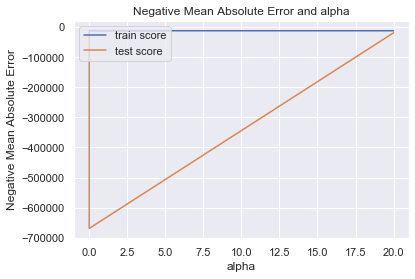

In [380]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [381]:
alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

C:\Users\sp14590\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 844930520.1875, tolerance: 638069879.9477068
  positive)


Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

In [384]:
y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.9441374042885247

In [386]:
alpha =20

lasso = Lasso(alpha=alpha)

lasso.fit(X_test, y_test)

y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.9503910360942309

#### So we see that with lasso regression also we are getting a good score

### Hence we see that with both lasso and Ridge regression we are able to get test and train score. We can use either for the final model and would be going ahead with the Lasso model